# **EDA of Amazon Top 50 Bestselling Books 2009 - 2019**

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.

Link : [Click Here](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

**Importing the needed Python packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.show()
%matplotlib inline

**Uploading the dataset**

In [3]:
ab = pd.read_csv('bestsellers with categories.csv')

**Showing the top 5 rows and columns of the data**

In [58]:
ab.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**To find if there any null value exists**

In [5]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


**Using describe function for showing of various Descriptive Statistics measures**

In [6]:
ab.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


**Assigning the index for using it as a axes**

In [7]:
ind = np.arange(1,551)
ab.count()

Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64

**Pairplot to show various relations based on genre**

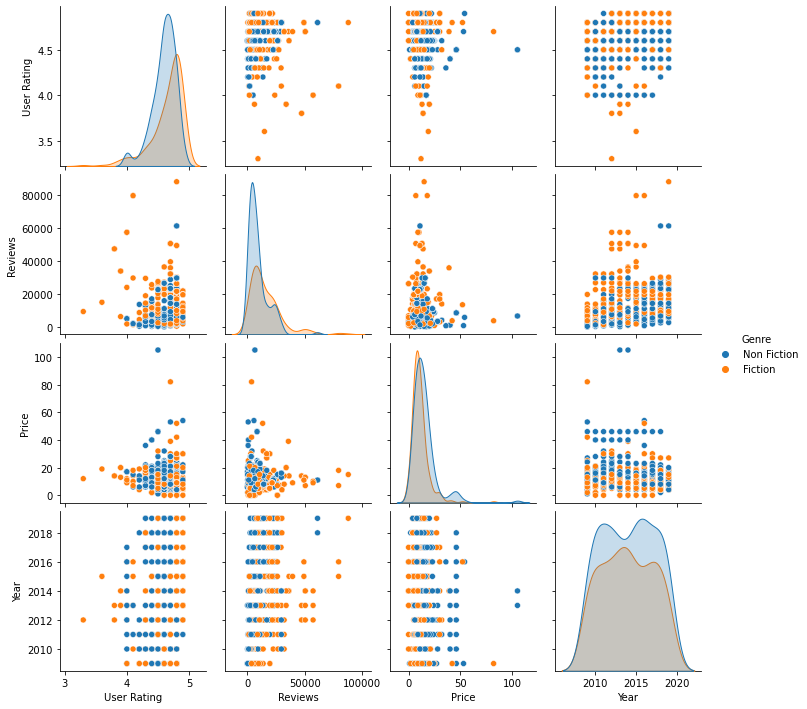

In [8]:
sns.pairplot(ab, hue= 'Genre')

**Barplot to find the frequency of the Genres**

<AxesSubplot:xlabel='Genre'>

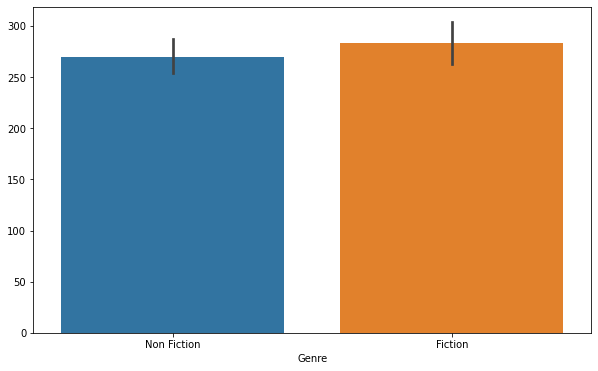

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='Genre', y = ind, data =ab)

There are more Fiction movies than Non Fiction

**Finding the count of Fiction movies**

In [10]:
ab[ab['Genre'] == 'Fiction'].count()

Name           240
Author         240
User Rating    240
Reviews        240
Price          240
Year           240
Genre          240
dtype: int64

**Finding the count of Non Fiction movies**

In [16]:
ab[ab['Genre']=='Non Fiction'].count()

Name           310
Author         310
User Rating    310
Reviews        310
Price          310
Year           310
Genre          310
dtype: int64

**Pie Chart of the Genres**

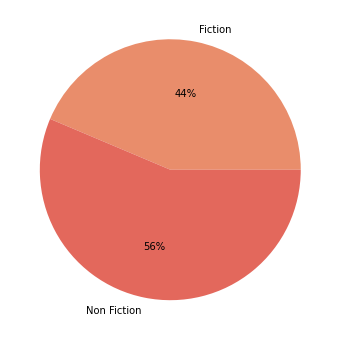

In [43]:
plt.figure(figsize=(6,6))

data=[240,310]
labels = ['Fiction','Non Fiction']
colors = sns.color_palette('flare')[0:5]
plt.pie(data,labels=labels,colors=colors,autopct='%.0f%%')
plt.show()

**Showing the row with maximunm reviews**

In [37]:
ab[ab['Reviews'] == ab['Reviews'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


**Showing the row with minimunm reviews**

In [39]:
ab[ab['Reviews']== ab['Reviews'].min()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


**Showing the lmplot of the ticket prices to years**

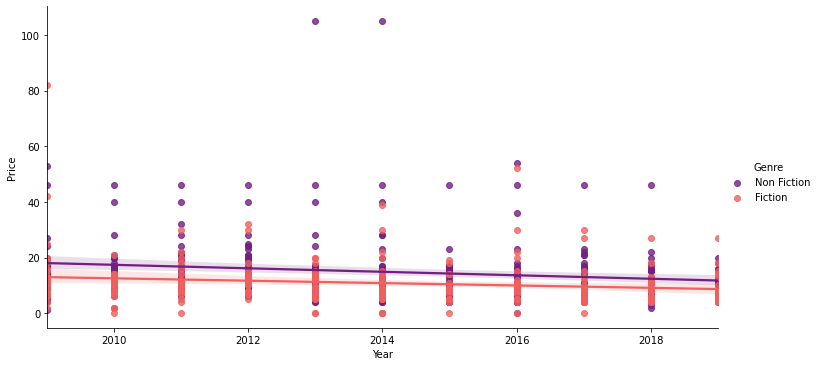

In [51]:
sns.lmplot(x='Year', y='Price', data=ab, height=5,aspect=2,hue='Genre',palette='magma')

The ticket prices have reduced over the years

**Showing maximum priced movies**

In [52]:
ab[ab['Price'] == ab['Price'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


**Showing minimum priced movies**

In [53]:
ab[ab['Price']== ab['Price'].min()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


**Showing the row with maximunm User Rating**

In [54]:
ab[ab['User Rating']== ab['User Rating'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


**Showing the row with minimunm User Rating**

In [55]:
ab[ab['User Rating']== ab['User Rating'].min()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


**Showing the count of Reviews based on Genre**

<AxesSubplot:xlabel='User Rating'>

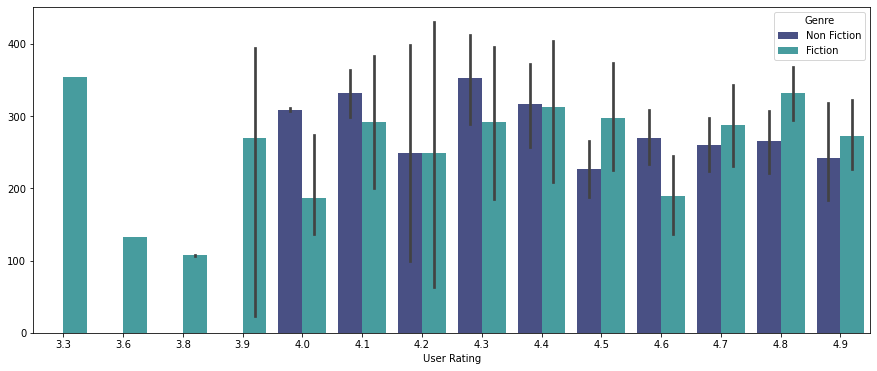

In [56]:
plt.figure(figsize=(15,6))
sns.barplot(y=ind,x='User Rating', data=ab,hue='Genre',palette='mako')

**This notebook inspired by VISHAL AGARWAL and I use it for researching only!!**

**Thanks for sharing!**